<h2 style='color:blue' align="center"> PRC_7:Support Vector Machine Tutorial Using Python Sklearn</h2>

## Aim: Perform SVM modelling on digits dataset from scikit learn librarary, get accuracy score by fitting model as well as by various methods like regularization, gamma & lenear_kernel try to achive maximum accuracy by varying gamma and C value.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

<img height=50 width=50 src="iris_petal_sepal.png"/>

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

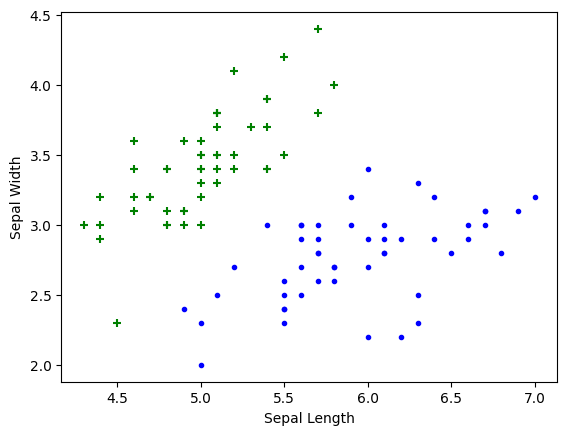

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

**Petal length vs Pepal Width (Setosa vs Versicolor)**

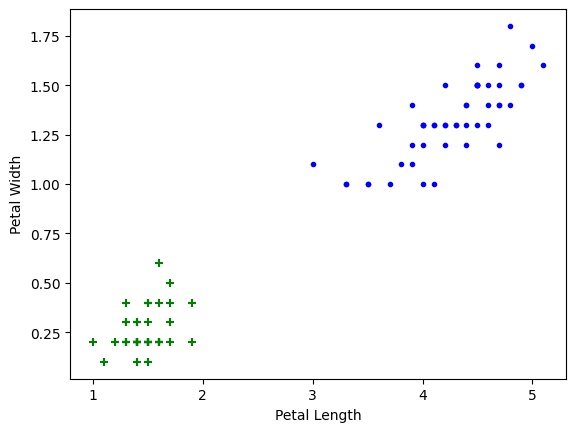

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train Using Support Vector Machine (SVM)**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(X_train, y_train)

SVC()

In [21]:
model.score(X_test, y_test)

0.9666666666666667

In [22]:
model.predict([[4.8,3.0,1.5,0.3]])

e:\learning python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

**Tune parameters**

**1. Regularization (C)**

In [23]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [24]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

1.0

**2. Gamma**

In [25]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

**3. Kernel**

In [26]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
model_linear_kernal.score(X_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size


## Digits_Dataset from Scikit_learn

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

In [29]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [32]:
X_train

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 14.,  1.,  0.],
       [ 0.,  0.,  2., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.]])

In [33]:
y_train

array([4, 8, 8, ..., 8, 3, 1])

In [34]:
model.fit(X_train, y_train)

SVC()

### Acuuracy Through SVM model

In [35]:
model.score(X_test, y_test)

0.9833333333333333

In [36]:
accuracy=[]

In [37]:
accuracy.append(model.score(X_test, y_test))

In [38]:
accuracy

[0.9833333333333333]

### [1] Regulirizartion(C)

In [39]:
k=[]
for i in range(1,11):
    k.append(i)

In [40]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [41]:
reg=[]
maxa=0
for i in k:
    
    model_C = SVC(C=i)
    model_C.fit(X_train, y_train)
    c=model_C.score(X_test, y_test)
    reg.append(c)

    print("C=",i,"Score=",c)
    if(c>maxa):
        
        maxa=c
        m=i 
print("Best Reguliraztion Score Obtained at C=",m,"at Score of",maxa)

C= 1 Score= 0.9833333333333333
C= 2 Score= 0.9888888888888889
C= 3 Score= 0.9861111111111112
C= 4 Score= 0.9861111111111112
C= 5 Score= 0.9861111111111112
C= 6 Score= 0.9861111111111112
C= 7 Score= 0.9861111111111112
C= 8 Score= 0.9861111111111112
C= 9 Score= 0.9861111111111112
C= 10 Score= 0.9861111111111112
Best Reguliraztion Score Obtained at C= 2 at Score of 0.9888888888888889


In [42]:
#reg

In [43]:
accuracy.append(maxa)

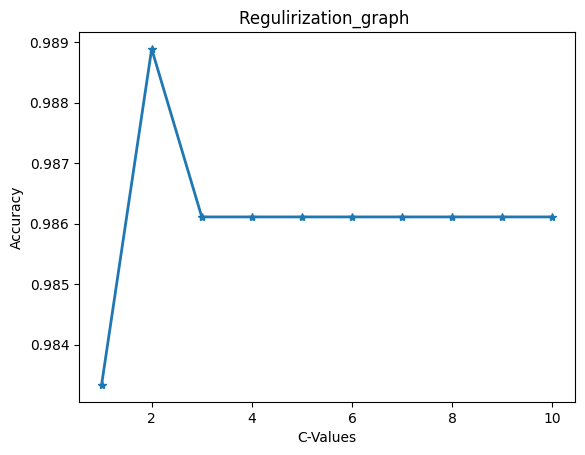

In [44]:
plt.title('Regulirization_graph ')
plt.plot(k, reg,linewidth=2, marker ='*', label = 'Regulirization_graph')
plt.xlabel('C-Values')
plt.ylabel('Accuracy')
plt.show()

## [2] gamma

In [45]:
k=[]
for i in range(1,11):
    k.append(i/1000)

In [46]:
k

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

In [47]:
g=[]
maxa=0
for i in k:
    
    model_g = SVC(gamma=i)
    model_g.fit(X_train, y_train)
    c=model_g.score(X_test, y_test)
    print("gamma=",i,"Score=",c)
    g.append(c)
    if(c>maxa):
        maxa=c
        m=i
print("Best Gamma Score Obtained at gmma=",m,"at Score of",maxa)

gamma= 0.001 Score= 0.9888888888888889
gamma= 0.002 Score= 0.9861111111111112
gamma= 0.003 Score= 0.9861111111111112
gamma= 0.004 Score= 0.9833333333333333
gamma= 0.005 Score= 0.9694444444444444
gamma= 0.006 Score= 0.95
gamma= 0.007 Score= 0.9083333333333333
gamma= 0.008 Score= 0.8777777777777778
gamma= 0.009 Score= 0.8527777777777777
gamma= 0.01 Score= 0.825
Best Gamma Score Obtained at gmma= 0.001 at Score of 0.9888888888888889


In [48]:
#g

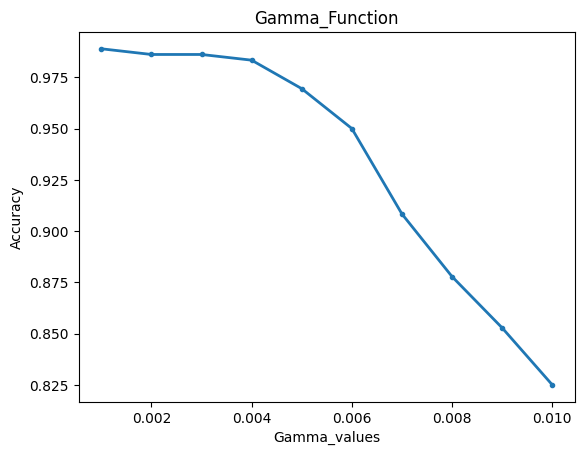

In [49]:
plt.title('Gamma_Function')
plt.plot(k, g,linewidth=2, marker ='.', label = 'Gamma_Function')
plt.xlabel('Gamma_values')
plt.ylabel('Accuracy')
plt.show()

In [50]:
accuracy.append(maxa)

## [3] kernel

In [51]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
model_linear_kernal.score(X_test, y_test)

0.9833333333333333

In [53]:
accuracy.append(model_linear_kernal.score(X_test, y_test))

In [54]:
accuracy

[0.9833333333333333,
 0.9888888888888889,
 0.9888888888888889,
 0.9833333333333333]

## Plotting Graphs on accuracy :

In [55]:
accuracy_tag=['SVM_Model','Regularization','Gamma Score','Linear_kernel']

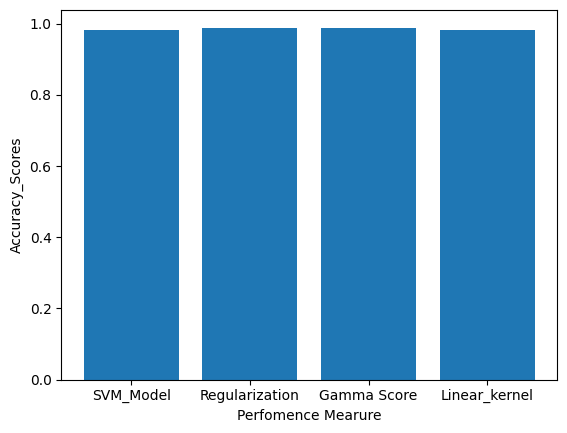

In [56]:
# Marks of RAM in different subjects out of 100.
x = accuracy_tag
y = accuracy

plt.bar(x, y)
plt.xlabel("Perfomence Mearure")
plt.ylabel("Accuracy_Scores")
#plt.yticks([]) # Command for hiding y-axis

plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

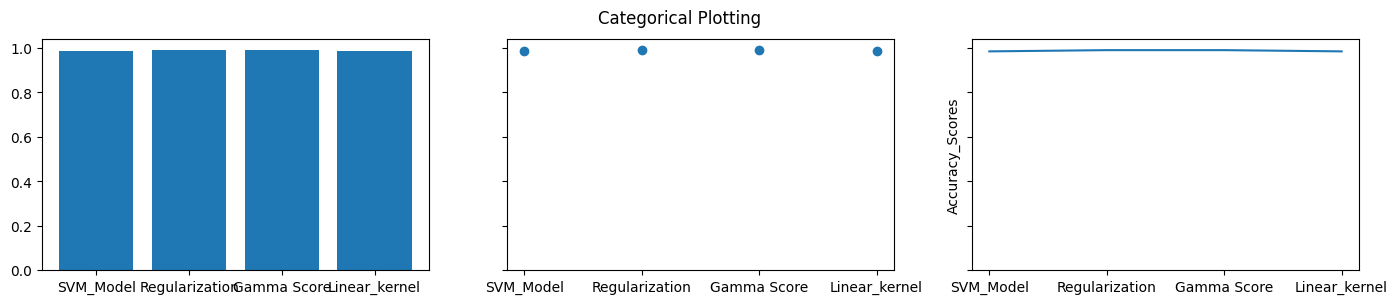

In [57]:
names=accuracy_tag
values=accuracy
fig, axs = plt.subplots(1, 3, figsize=(17, 3), sharey=True)
plt.ylabel("Accuracy_Scores")
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

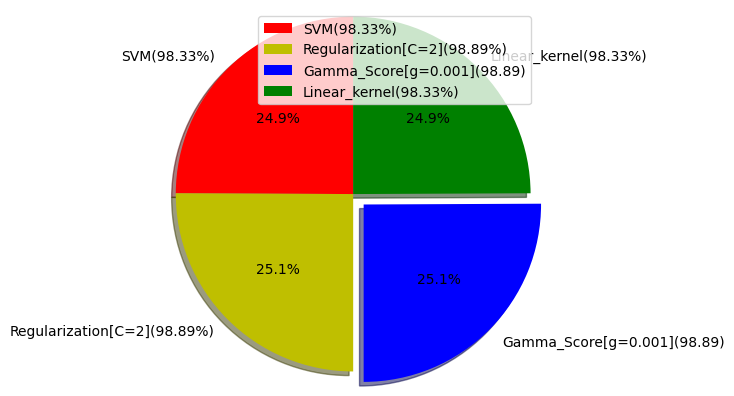

In [59]:
import matplotlib.pyplot as plt

# defining labels
activities = ['SVM(98.33%)', 'Regularization[C=2](98.89%)','Gamma_Score[g=0.001](98.89)','Linear_kernel(98.33%)']

# portion covered by each label
slices = accuracy

# color for each label
colors = ['r', 'y','b','g']

# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')

# plotting legend
plt.legend()

# showing the plot
plt.show()


## Result: I have sucessfully perfomed the SVM modelling on digits dataset available on scikit learn library got accuracy score as follows:
### [1] SVM model : 98.33 %
### [2] Regularization : by variying C value from 1 to 10 got 98.89 at C=2.
### [3] Gamma Score : By variying gamma value from 0.001 to 0.01 got 98.89 at gamma=0.001
### [4] Through Linear_kernel : 98.33% 
### from this I conclude that max score obtained by Gamma & regularization at gamma=0.001 & C=2 with score of 98.89